In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
url="B:\\MLtried\\taitanic\\taitanic.csv"
df=pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


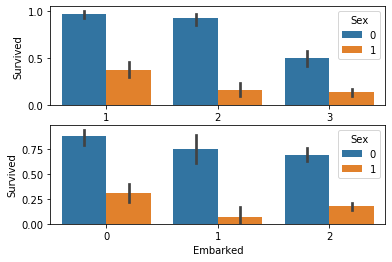

In [98]:
df1=df.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df1["Sex"] = lb.fit_transform(df1["Sex"])
df1.Embarked.fillna("S",inplace=True)
df1["Embarked"] = lb.fit_transform(df1["Embarked"])
df1.loc[df1.Age< 1,"Age"]=1
df1.Age.fillna(df1["Age"].mean(),inplace=True)
fig, axs = plt.subplots(nrows=2)
sns.barplot(data=df1,x="Pclass",y="Survived",hue="Sex",ax=axs[0])
sns.barplot(data=df1,x="Embarked",y="Survived",hue="Sex",ax=axs[1])
df1.head()

In [130]:
x=df1.drop("Survived",axis=1)
y=df1.Survived
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,average_precision_score,balanced_accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)
log=LogisticRegression( fit_intercept=False,solver='newton-cg', C = 1e9)
log.fit(X_train,y_train)
#print(log.coef_)
predictlog=log.predict(X_test)
print("Training with LR.score",log.score(X_train, y_train))
print("Testing with LR.score",log.score(X_test, y_test))
print("accuracy_score",accuracy_score(y_test,predictlog))
print("average_precision_score",average_precision_score(y_test,predictlog))
print("balanced_accuracy_score",balanced_accuracy_score(y_test,predictlog))
#log.score(y_test,predictlog.reshape(-1, 1))
logit = sm.Logit(y_train,X_train)
logitre=logit.fit()
logitre.summary()

[[-0.06226514 -2.72749036  0.02922878 -0.12711656 -0.43075945  0.016419
  -0.04607562]]
Training with LR.score 0.8146067415730337
Testing with LR.score 0.7671809256661991
accuracy_score 0.7671809256661991
average_precision_score 0.6059390657696488
balanced_accuracy_score 0.7352490643526646
Optimization terminated successfully.
         Current function value: 0.460767
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  178
Model:                          Logit   Df Residuals:                      171
Method:                           MLE   Df Model:                            6
Date:                Mon, 22 Jun 2020   Pseudo R-squ.:                  0.2980
Time:                        22:41:18   Log-Likelihood:                -82.017
converged:                       True   LL-Null:                       -116.83
Covariance Type:            nonrobust   LLR p-value:                 4.888e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.0623      0.181     -0.343      0.731      -0.418       0.293
Sex           -2.7275      0.429     -6.356      0.000      -3.569      -1.886
Age            0.0292      0.015      1.987      0.047       0.000       0.058
SibSp         -0.1271      0.237     -0.537      0.591      -0.591       0.337
Parch         -0.4308      0.440     -0.979      0.328      -1.293       0.432
Fare           0.0164      0.007      2.316      0.021       0.003       0.030
Embarked      -0.0461      0.246     -0.188      0.851      -0.527       0.435
==============================================================================
"""

roc score =  0.7934289404828934


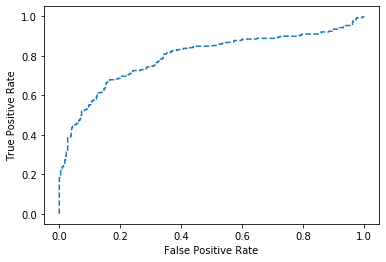

In [143]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = log.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)
print( "roc score = ",roc_auc_score(y_test, probs))
plt.plot(fpr, tpr, linestyle='--', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()